In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0,10)
y = np.random.randint(0,100,size=10) # 상관도 0에 가까움
np.corrcoef(x,y) #상관관계(두 변수들 함께 변화)계산

array([[ 1.        , -0.17733413],
       [-0.17733413,  1.        ]])

In [3]:
sns.set_theme(style='darkgrid')#테마 설정 기능
tips = sns.load_dataset("tips") #팁 데이터 가져오기
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


* relplot: 산점도그래프, 선그래프 모두 그릴 수 있는 함수


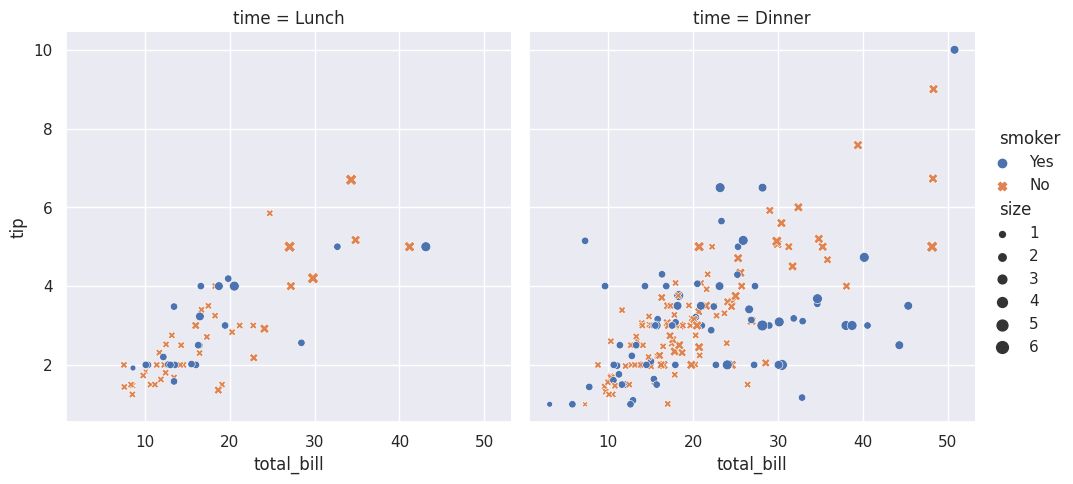

In [4]:
#식사비와 팁의 관계 - (relplot 산점도그래프)
#relplot: 산점도그래프, 선그래프 모두 그릴 수 있는 함수
sns.relplot(data=tips , x="total_bill", y ="tip", col="time"\
            , hue="smoker", style="smoker", size="size") #hue:color 

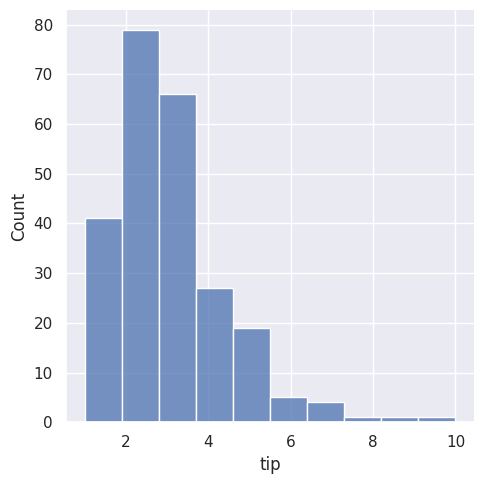

In [ ]:
#히스토그램
sns.displot(tips['tip'],kde= False ,bins=10) 

<ipython-input-9-534f2c834a3c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip_pct'],kde=True, bins =20) #kde = 가우시안 커널밀도 추정


<Axes: xlabel='tip_pct', ylabel='Density'>

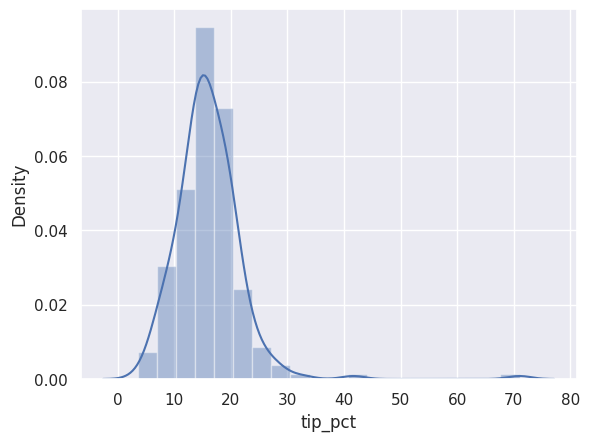

In [ ]:
tips['tip_pct']= tips['tip']*100 / tips['total_bill']
tips.head()
sns.distplot(tips['tip_pct'],kde=True, bins =20) #kde = 가우시안 커널밀도 추정

* regplot: 선형회귀직선(axes객체 만든다 -> set_ 해야함)


Text(0.5, 1.0, 'total bill and tip')

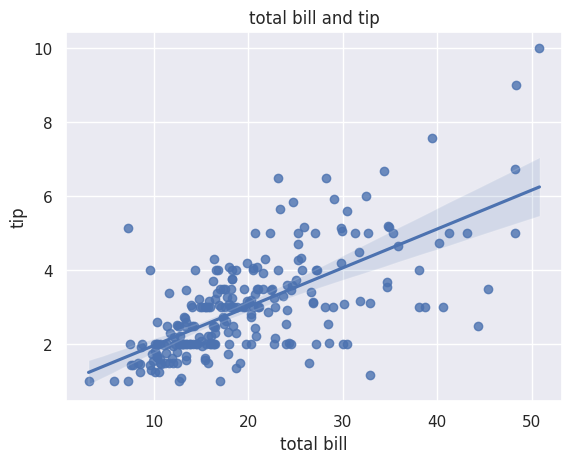

In [5]:
#regplot: 선형회귀직선(axes객체 만든다 -> set_ 해야함)
ax = sns.regplot(data=tips, x='total_bill',y='tip')
ax.set_xlabel('total bill')
ax.set_ylabel('tip')
ax.set_title('total bill and tip')

* 쌍그래프(pairplot): 관계보기 편함

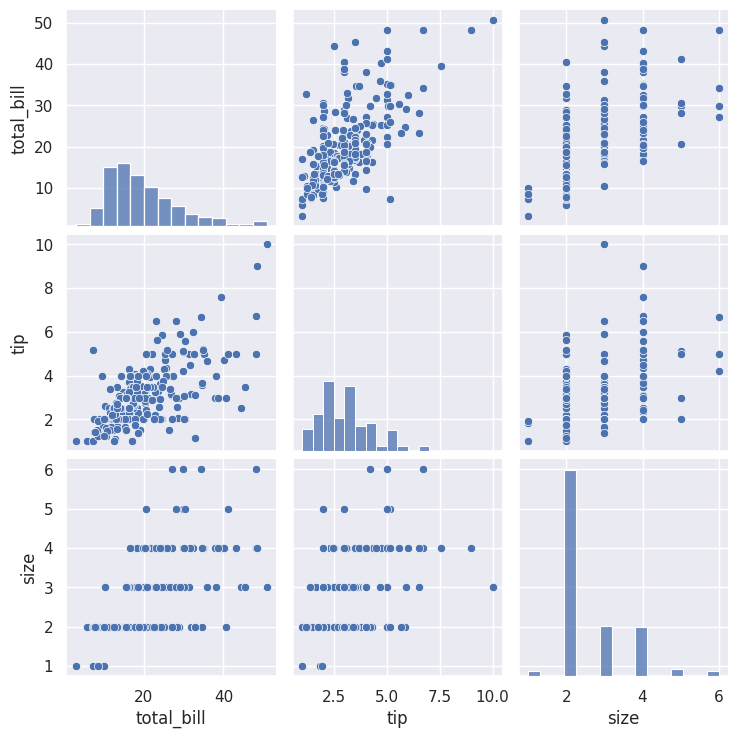

In [ ]:
sns.pairplot(tips) # 쌍그래프: 관계보기 편함

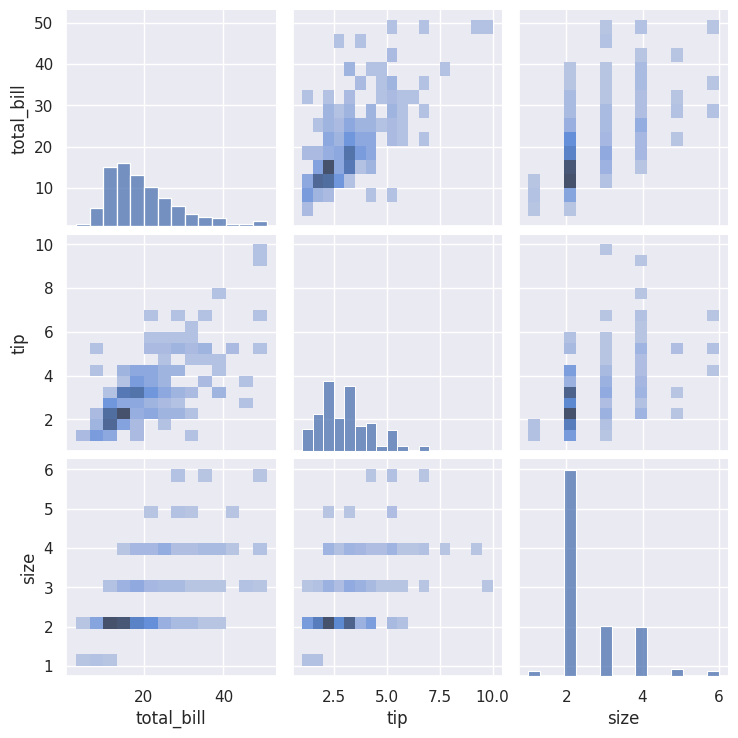

In [ ]:
#도전문제
sns.pairplot(tips,kind='hist') #히스토그램
#sns.pairplot(tips,kind='kde')#밀도그래프

* string(문자)을 숫자로 변환시킴(데이터변환)


In [ ]:
#string(문자)을 숫자로 변환시킴(데이터변환)
import numpy as np
tips['smoker_n'] = np.where(tips['smoker']=='Yes',1,0)
tips['sex_n'] = np.where(tips['sex']=='Male',1,0)
tips['time_n'] = np.where(tips['time']=='Dinner',1,0)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,smoker_n,sex_n,time_n
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,1


In [ ]:
anscombe = sns.load_dataset('anscombe')
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


* lmplot: regplot과 유사(선형회귀직선) + 보기좋은 격자간격 생성

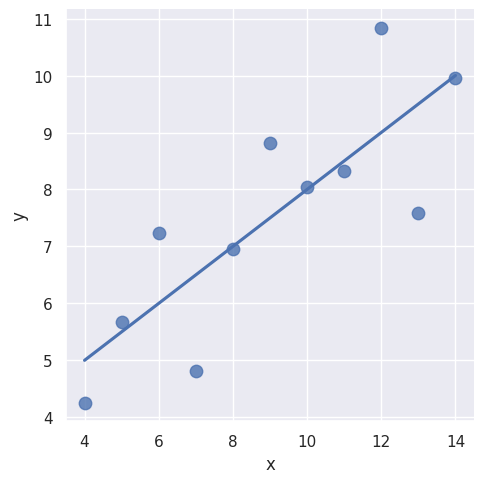

In [ ]:
sns.lmplot(x='x',y='y',data=anscombe.query("dataset== 'I'")\
           ,ci=None, scatter_kws={"s":80}) 
# regplot과 유사 + 보기좋은 격자간격 생성

<Axes: xlabel='x', ylabel='y'>

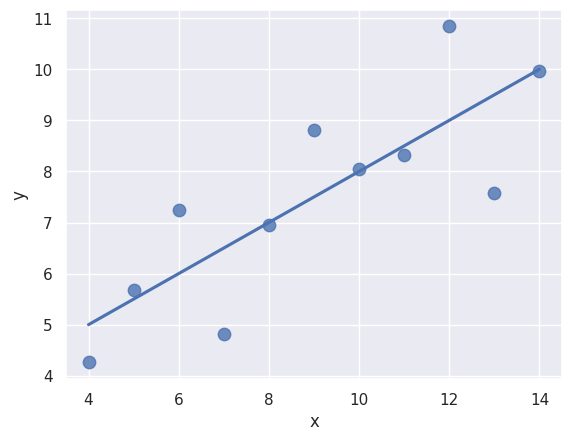

In [ ]:
sns.regplot(x='x',y='y', data=anscombe.query("dataset== 'I'"),\
            ci=None, scatter_kws={"s":80})

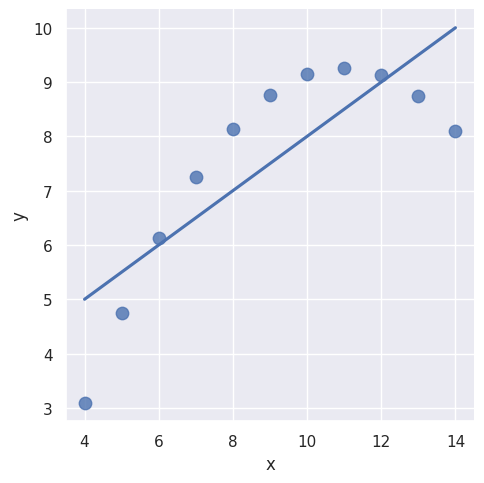

In [ ]:
sns.lmplot(x='x',y='y', data=anscombe.query("dataset== 'II'"),
           ci=None, scatter_kws={"s":80})

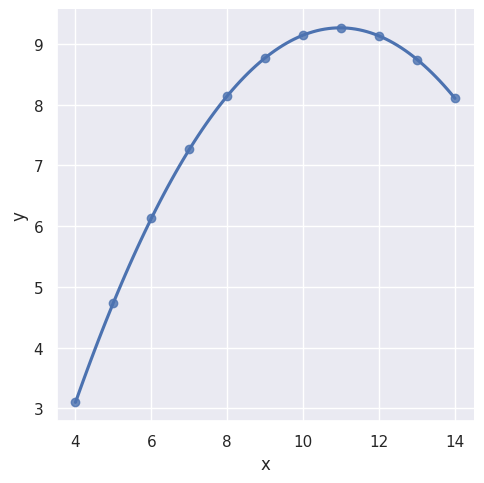

In [ ]:
sns.lmplot(x='x',y='y', data=anscombe.query("dataset== 'II'"),order=2) # order=2하면 이차 함수 형태 곡선 생김

/usr/local/lib/python3.9/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.9/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.9/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last iteration produced a perfect fit of the weighted data.
  warnings.warn('Estimated scale is 0.0 indicating that the most'
/usr/local/lib/python3.9/dist-packages/statsmodels/robust/robust_linear_model.py:288: ConvergenceWarning: Estimated scale is 0.0 indicating that the most last i

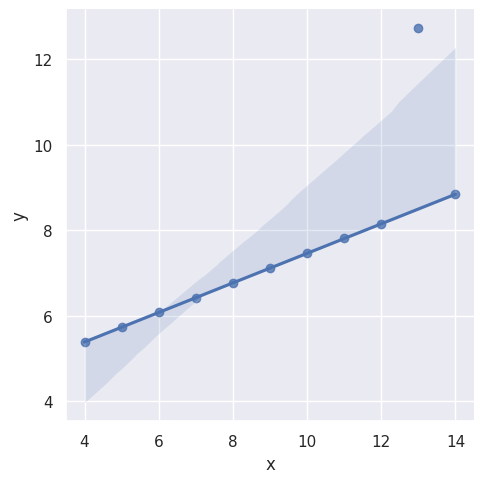

In [ ]:
sns.lmplot(x='x',y='y', data=anscombe.query("dataset== 'III'"),robust=True)
#robust: 오류제거-> 이상치에 덜 민감해짐

In [ ]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Figure size 1000x300 with 0 Axes>

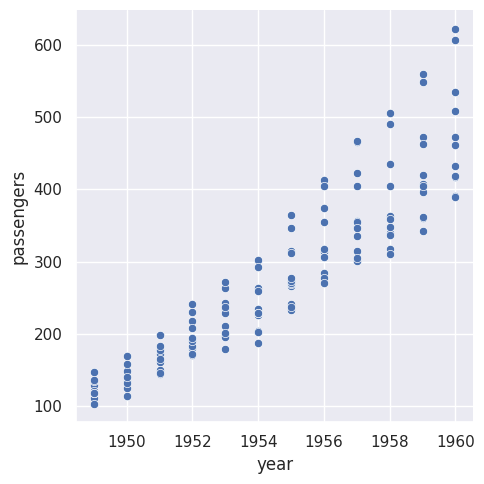

In [ ]:
plt.figure(figsize=(10,3))
sns.relplot(data=flights, x='year',y='passengers')

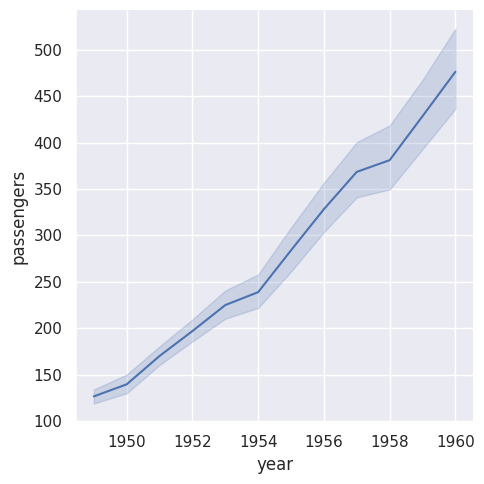

In [ ]:
sns.relplot(data=flights, x='year',y='passengers',kind='line') 
# relplot는 산점도, 라인 둘다 가능(kind에서 선택)

<Axes: xlabel='year', ylabel='passengers'>

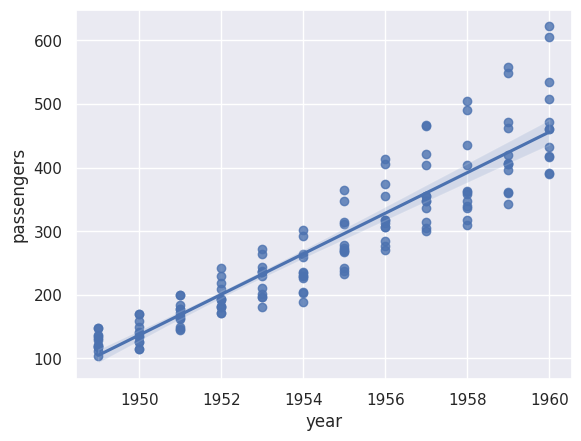

In [ ]:
sns.regplot(data=flights, x='year',y='passengers')
#일차곡선 => 비교하기 좋지 않은 그래프

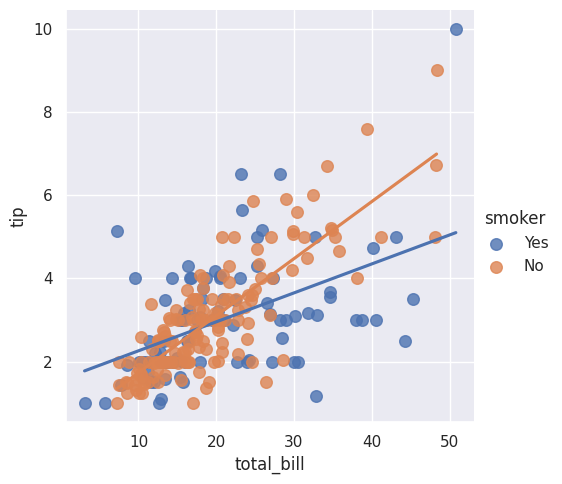

In [ ]:
# 연습문제1
tips = sns.load_dataset("tips")
sns.lmplot(data=tips, x='total_bill',y='tip', hue = "smoker"\
           , ci=None, scatter_kws={"s":70})

In [ ]:
#연습문제
df= sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


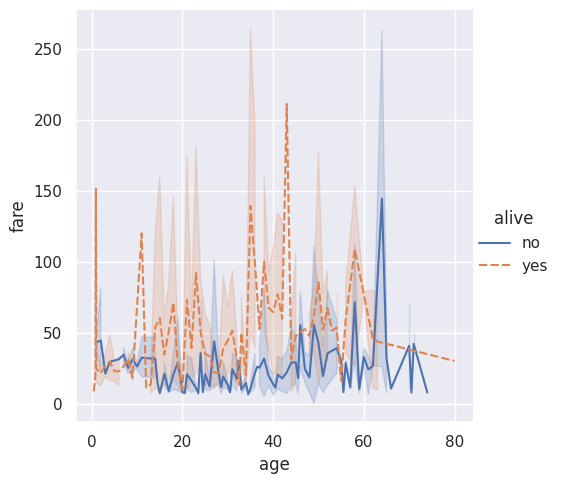

In [ ]:
sns.relplot(data=df, x='age',y='fare',hue='alive',style='alive',kind='line')
#산점도와 선 둘다 그릴 수 있음

* countplot: 자동으로 y값 나옴

<Axes: xlabel='class', ylabel='count'>

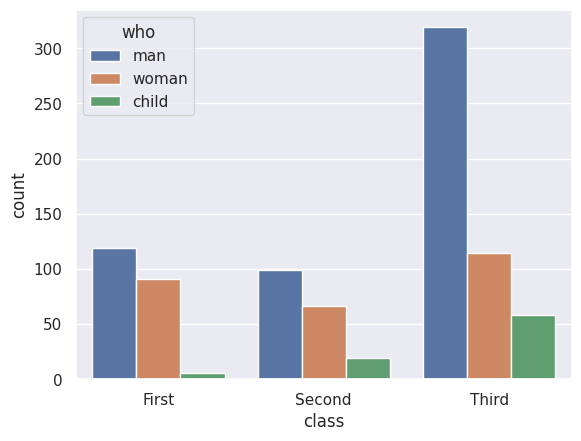

In [ ]:
sns.countplot(x='class',hue='who',data=df) #자동으로 y값 나옴

<Axes: xlabel='age', ylabel='fare'>

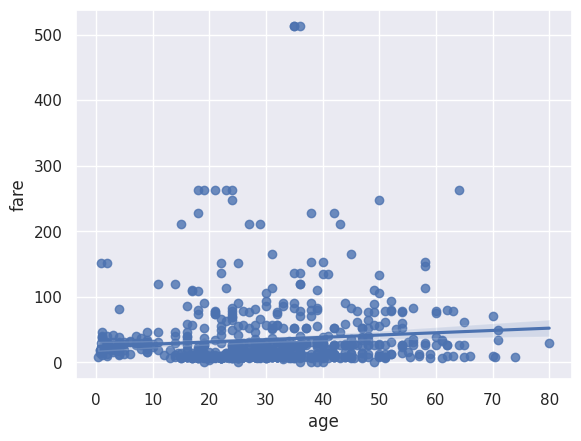

In [ ]:
sns.regplot(data=df,x='age',y='fare')

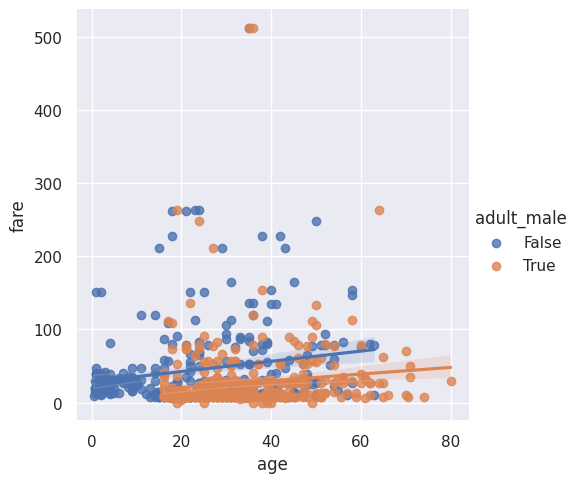

In [ ]:
sns.lmplot(data=df,x='age',y='fare',hue='adult_male')